In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("./data_paper/Force15kgf.csv")
data.head()

,Unnamed: 0,Cycle,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS (dt),CVES (dt),DIV,DVSOC50,SOH
0,0,1,1357.5,1283.5,72.82119,2.4414,11.036,1.680,0.01614,0.000072,2.5081,3.2522,1.00000
1,1,2,1357.7,1285.9,72.41452,2.7008,11.118,1.590,0.02041,0.000160,2.5014,3.2517,1.00134
2,2,3,1357.7,1286.0,72.05853,2.7048,11.090,1.680,0.02021,0.000129,2.5023,3.2520,1.00188
3,3,4,1357.8,1286.5,71.75321,2.7065,11.042,1.636,0.01887,0.000146,2.5049,3.2520,1.00215
4,4,5,1357.9,1286.7,71.49856,2.7071,11.020,1.624,0.01857,0.000180,2.5057,3.2519,1.00202


In [3]:
print(data['Cycle'].max())

558


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
def bisquare(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**2)**2)
        else:
            res.append(0)
    return np.array(res)

def tricube(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**3)**3)
        else:
            res.append(0)
    return np.array(res)

def get_n_th_distance(x,y,n):
    y=np.array(y)
    distance=abs(y-x)
    distance=np.sort(distance)
    return distance[n-1]


(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            WLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:36:59   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1095.9958     61.454     17.835      0.0

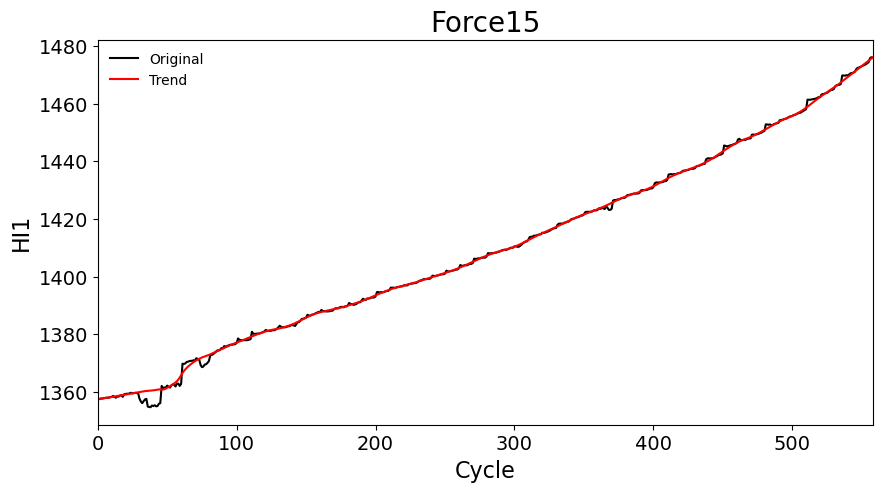

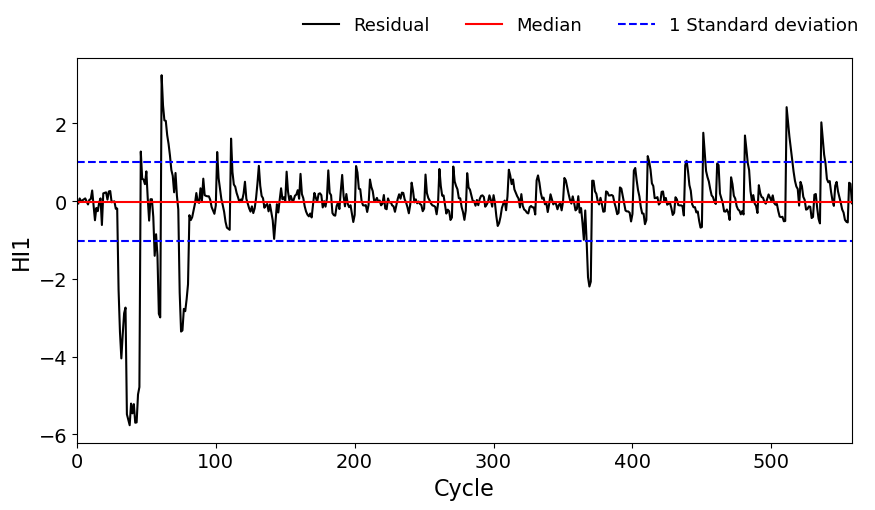

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
56
58
59
60
61
62
63
64
65
66
67
74
75
76
77
78
79
80
101
111
367
368
369
370
411
412
439
451
452
481
482
511
512
513
514
515
536
537
538


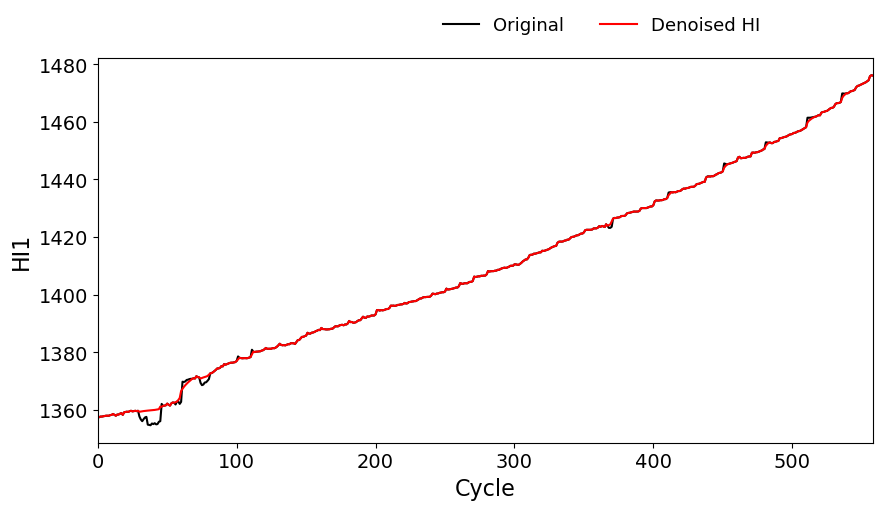

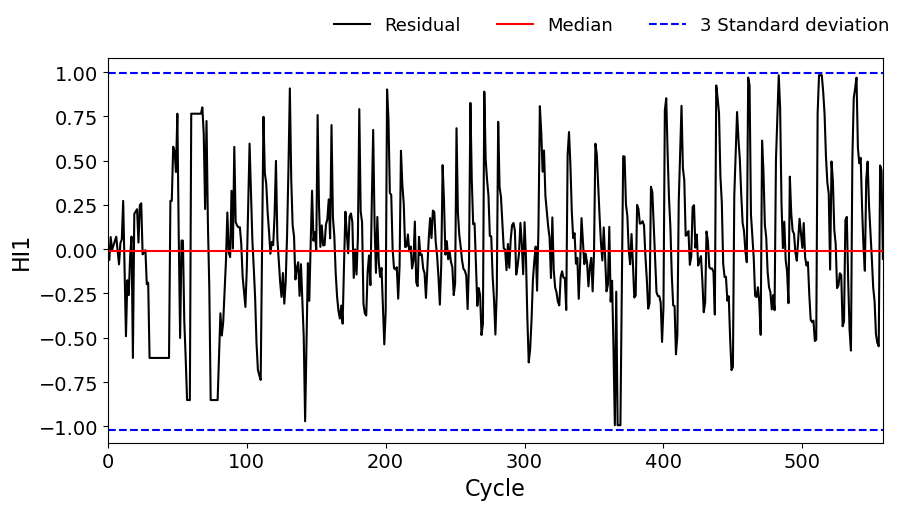

In [199]:
##############################################################
##############################################################

x= data['Cycle']
y= data['max.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    #t=y_res[cycle-1]
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.'].iloc[0]
    else :
        print(cycle)
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'max.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'max.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_max=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_max,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_max-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_max-y_trend
for t in y_res_2:
    if t>(1*std) or t<-(1*std):
        print("outlier")
    else:
        pass

### y_denoised_max=y_trend


(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.394e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:36:54   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1054.9563     39.748     26.541      0.0

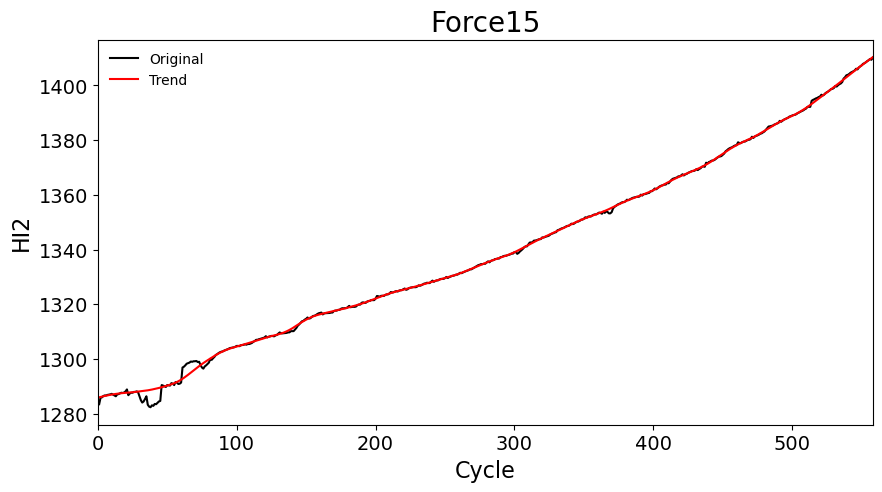

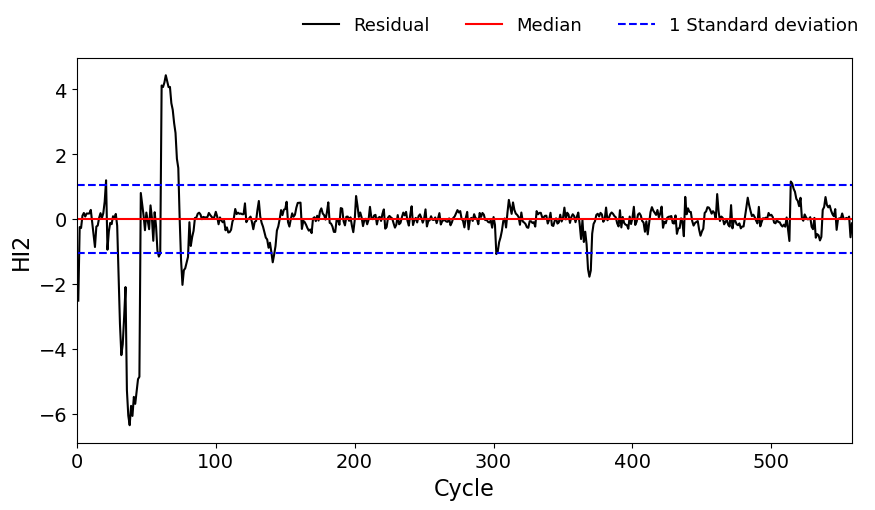

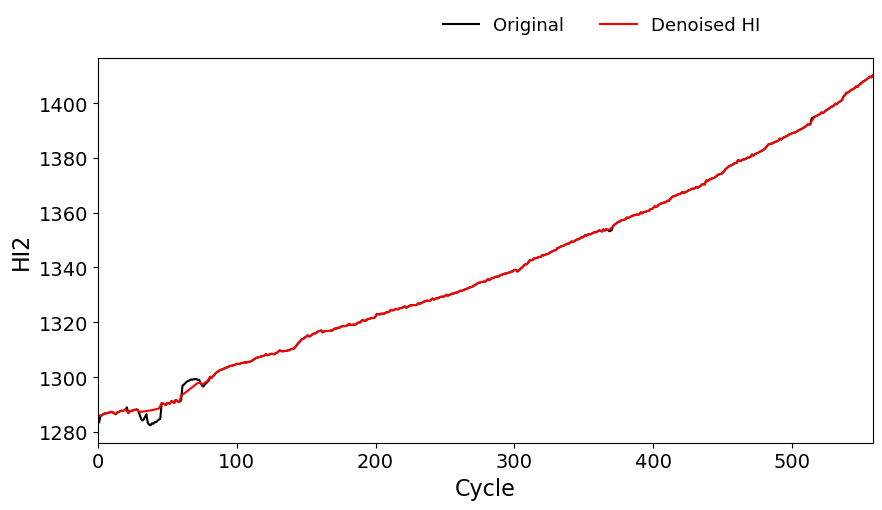

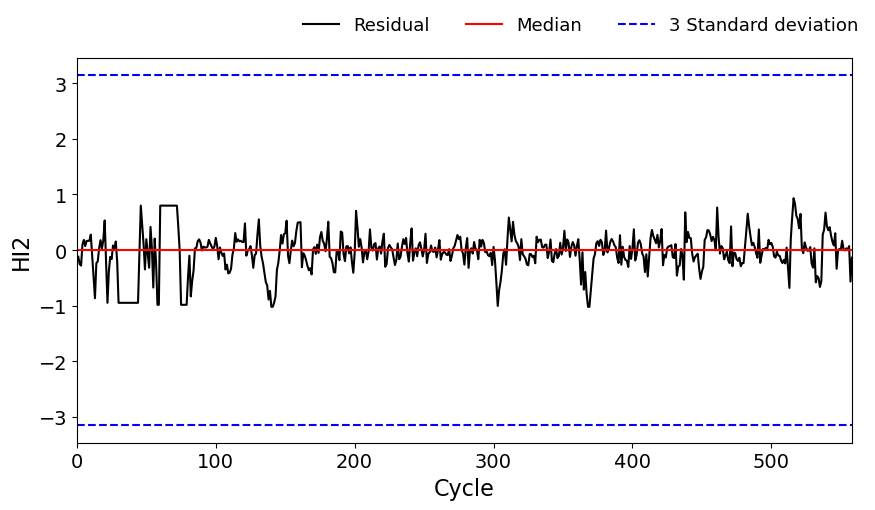

In [198]:
x= data['Cycle']
y= data['min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'min.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'min.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_min=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_min,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_min-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_min-y_trend
for t in y_res_2:
    if t>(3*std) or t<-(3*std):
        print("outlier")
    else:
        pass
# y_denoised_min=y_trend


(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            WLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     397.1
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          8.90e-108
Time:                        18:59:11   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4760     31.313     -0.271      0.7

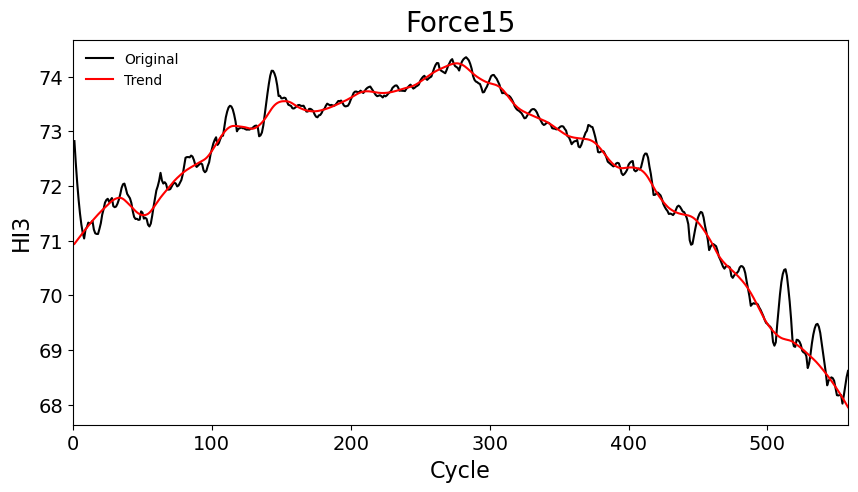

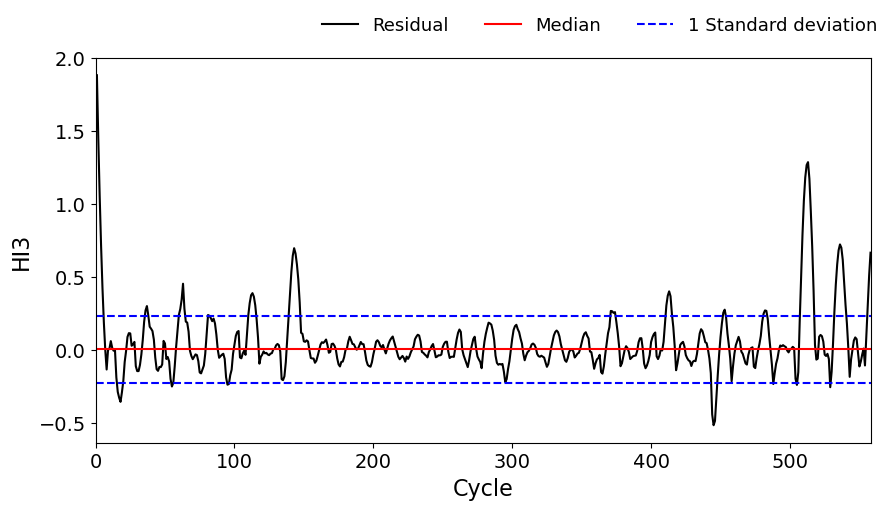

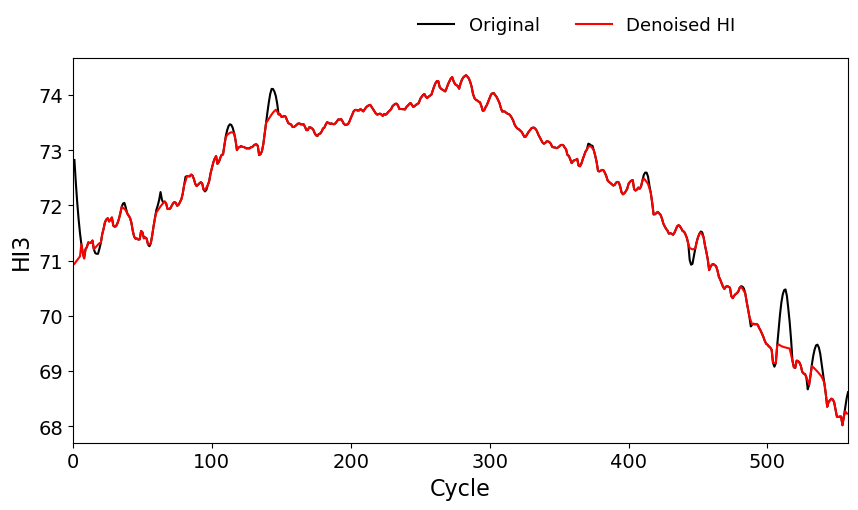

In [8]:
x= data['Cycle']
y= data['max.-min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.-min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.-min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
           
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_maxmin=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_maxmin,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            WLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     81.02
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.35e-31
Time:                        19:28:35   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7813      2.464      4.781      0.0

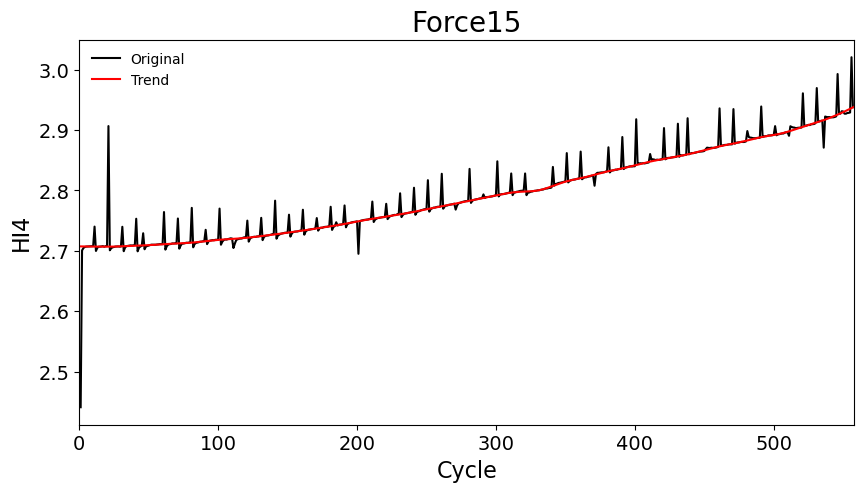

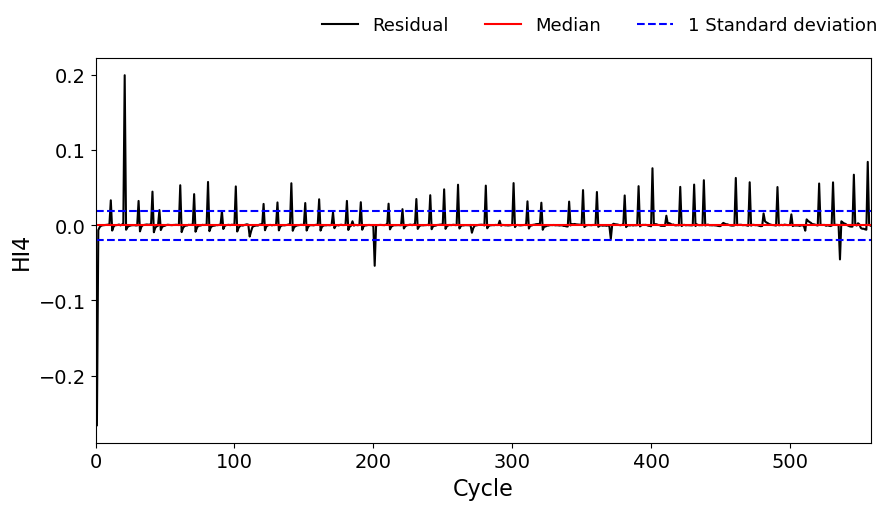

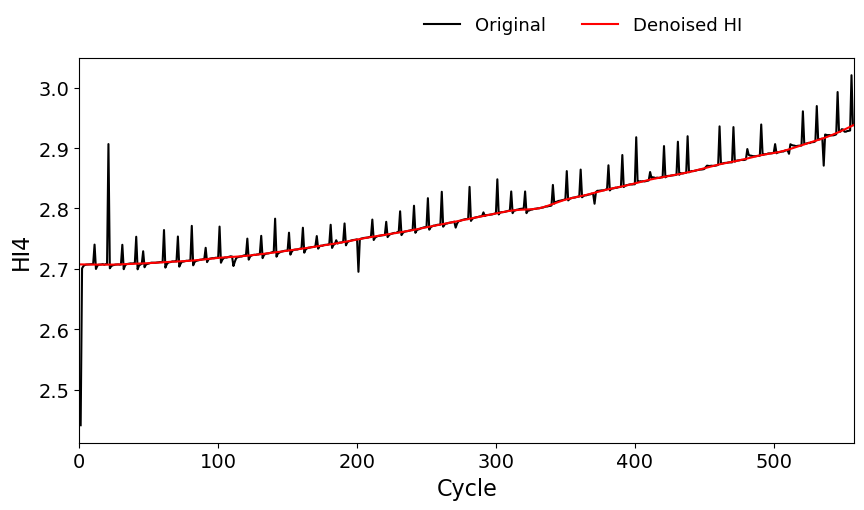

In [151]:
x= data['Cycle']
y= data['CIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-0.3)*std<=t<=median+0.3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_civ=np.array(denoised)

y_denoised_civ=y_trend


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_civ,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            WLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           5.32e-47
Time:                        19:13:35   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1135      4.076      2.727      0.0

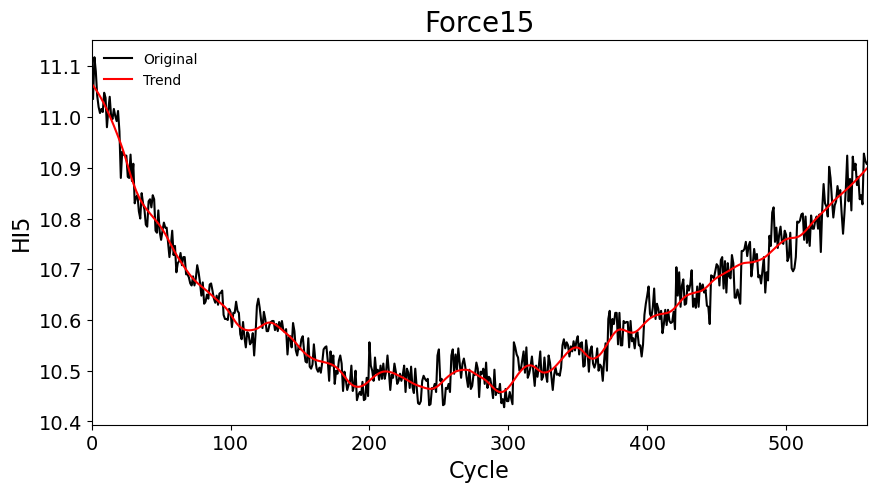

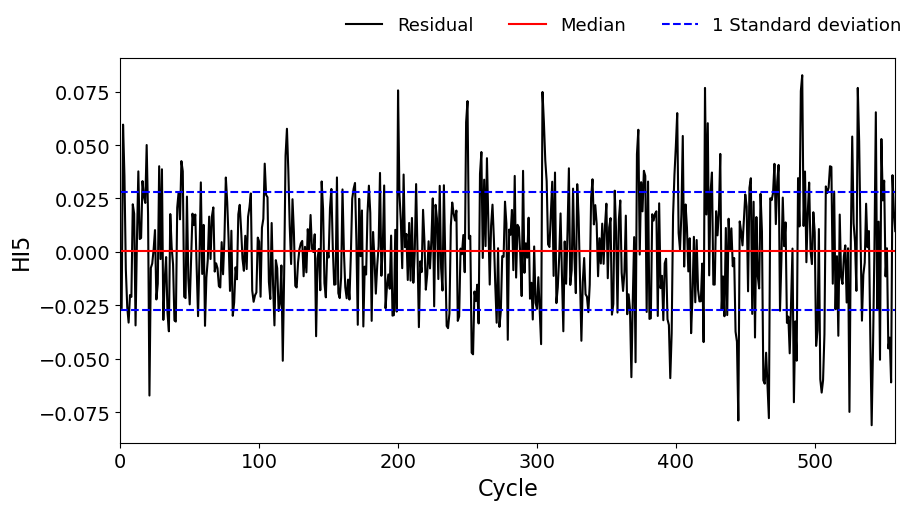

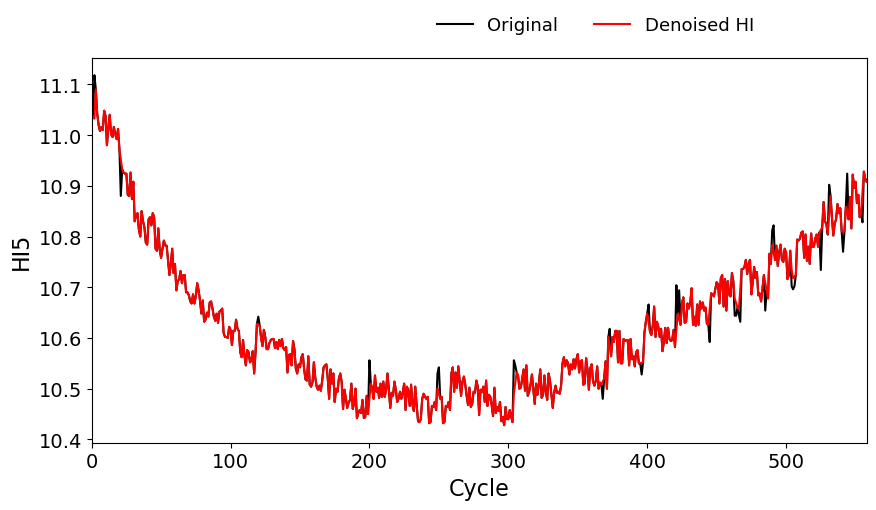

In [104]:
x= data['Cycle']
y= data['CCVIS']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVIS']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)
(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.977
Date:                Sun, 24 Mar 2024   Prob (F-statistic):             0.0193
Time:                        19:08:36   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0599      3.835      1.319      0.1

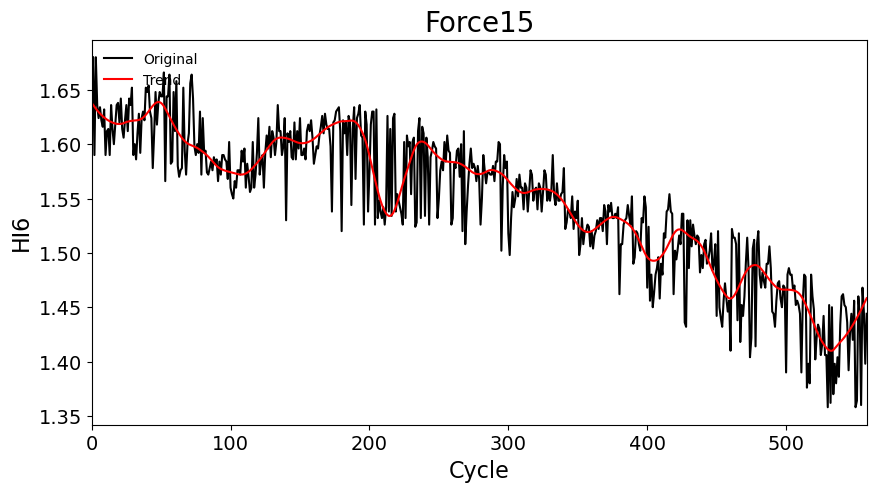

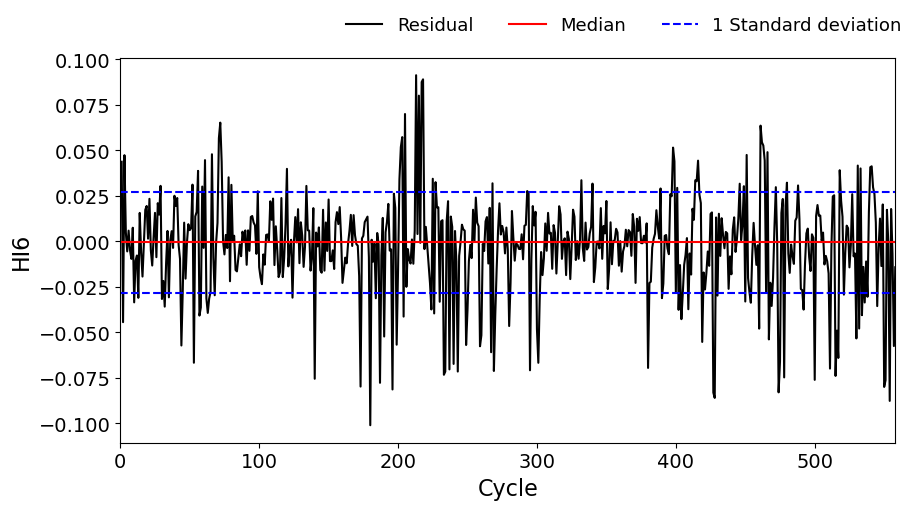

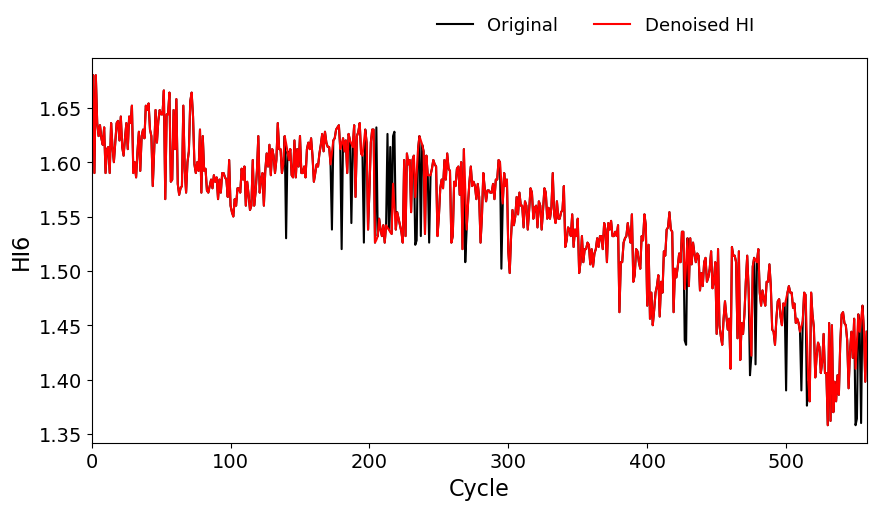

In [80]:
x= data['Cycle']
y= data['CCVES']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVES']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVES'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)
(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            WLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           0.000312
Time:                        19:12:51   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1481      0.063     -2.355      0.0

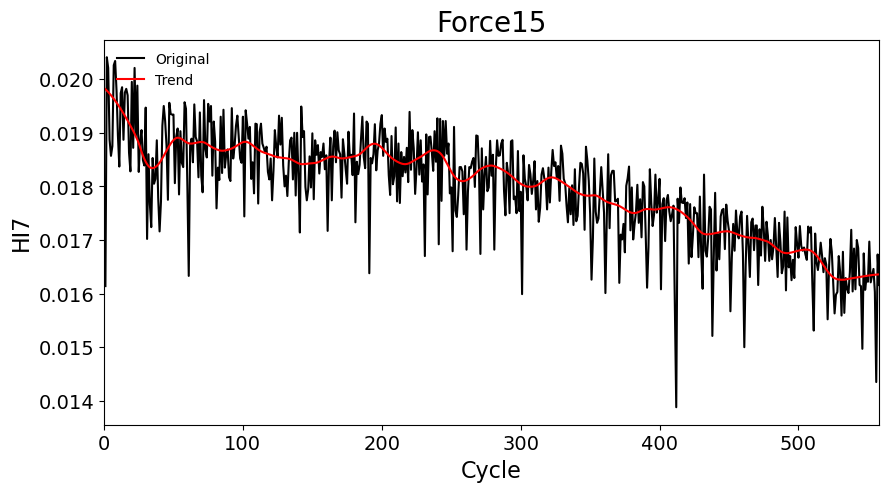

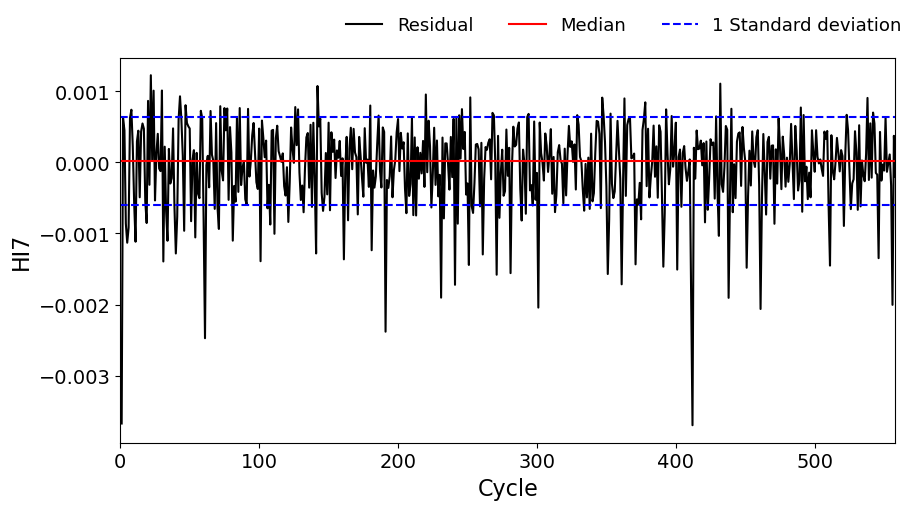

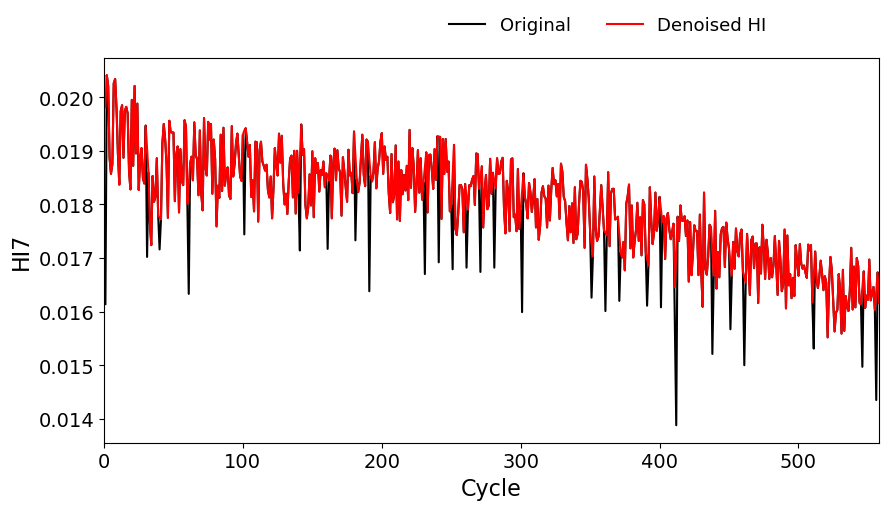

In [103]:
x= data['Cycle']
y= data.iloc[0:,8]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,8]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)
(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     17.74
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.40e-08
Time:                        19:12:32   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.004      2.315      0.0

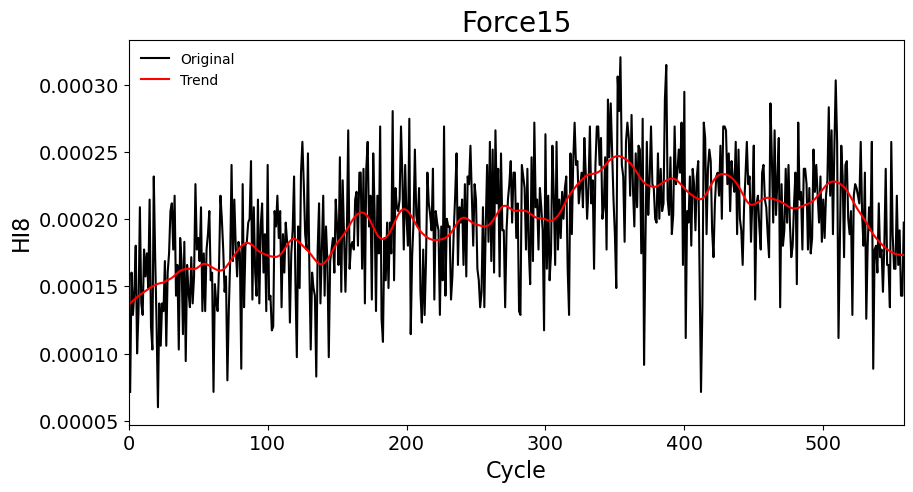

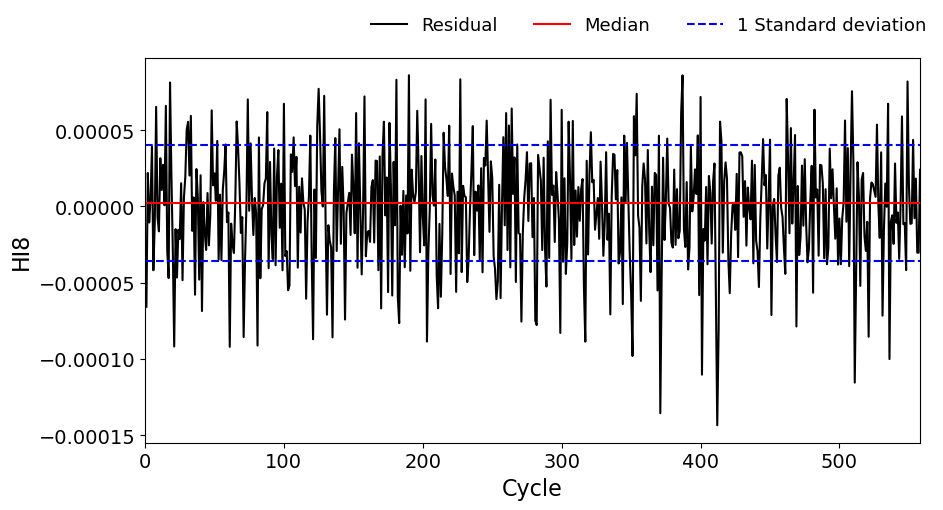

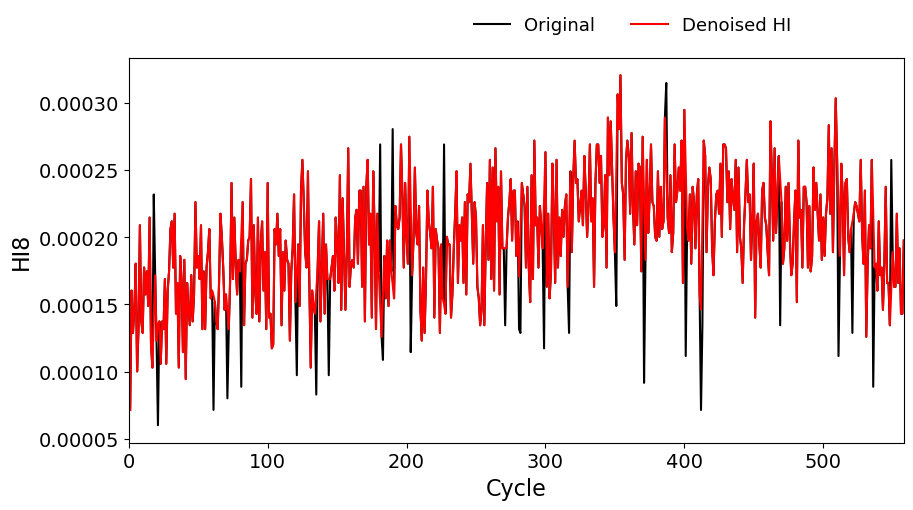

In [102]:
x= data['Cycle']
y= data.iloc[0:,9]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,9]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVES (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(558,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            WLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     340.9
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.63e-97
Time:                        19:11:53   Log-Likelihood:                   -inf
No. Observations:                 558   AIC:                               inf
Df Residuals:                     555   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0303      0.251      8.074      0.0

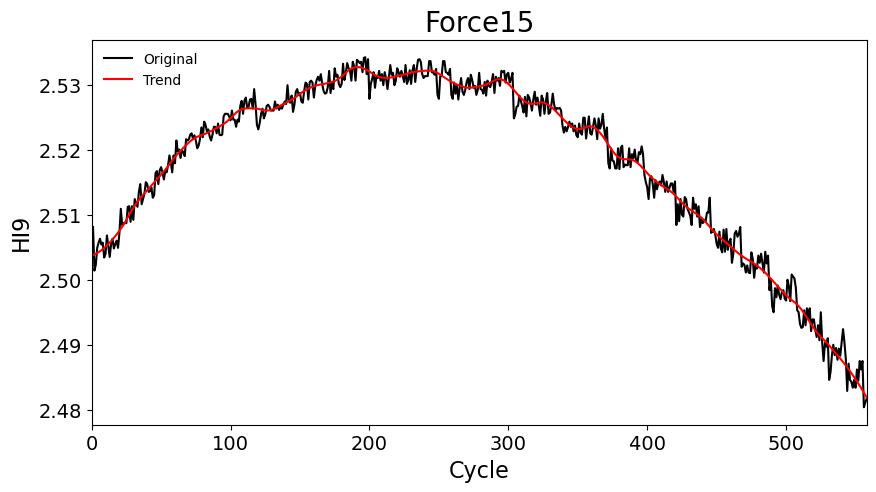

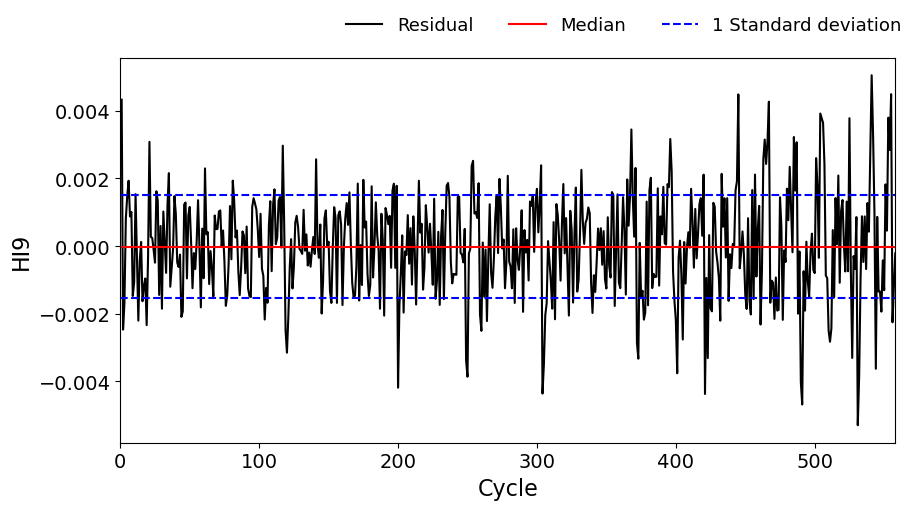

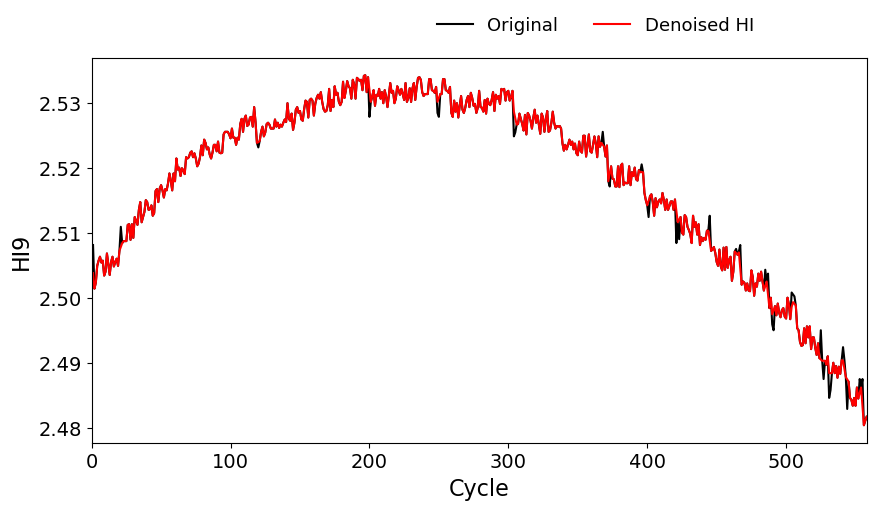

In [101]:
x= data['Cycle']
y= data['DIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['DIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'DIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_DIV=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_DIV,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


In [200]:
df = pd.DataFrame({'HI1': y_denoised_max, 'HI2': y_denoised_min, 'HI3': y_denoised_maxmin,
                  'HI4': y_denoised_civ, 'HI5': y_denoised_CCVIS, 'HI6': y_denoised_CCVES,
                  'HI7': y_denoised_CVIS, 'HI8': y_denoised_CVES, 'HI9': y_denoised_DIV})

print(df)

            HI1         HI2        HI3       HI4        HI5       HI6  \
0    1357.50000  1285.90000  70.940750  2.707436  11.036000  1.680000   
1    1357.70000  1285.90000  70.974476  2.707395  11.032241  1.590000   
2    1357.70000  1286.00000  71.008122  2.707356  11.090000  1.680000   
3    1357.80000  1286.50000  71.041666  2.707317  11.042000  1.636000   
4    1357.90000  1286.70000  71.075079  2.707279  11.020000  1.624000   
..          ...         ...        ...       ...        ...       ...   
553  1474.01238  1408.88011  68.016940  2.933916  10.846000  1.455972   
554  1474.37071  1409.21711  68.172180  2.935044  10.887044  1.468000   
555  1475.76866  1409.65740  68.271896  2.936188  10.928000  1.446000   
556  1476.11786  1409.38332  68.227990  2.937349  10.914000  1.398000   
557  1475.99312  1410.17343  68.227990  2.938526  10.908000  1.444000   

          HI7       HI8       HI9  
0    0.019814  0.000072  2.503777  
1    0.020410  0.000160  2.501400  
2    0.020210  

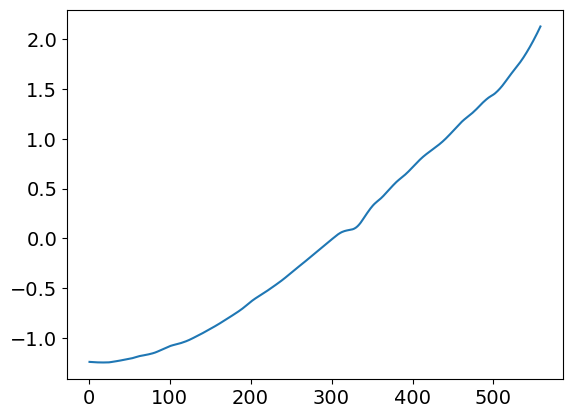

In [201]:
mean = np.mean(df['HI4'])
std = np.std(df['HI4'])
z_normalized_data = (df['HI4'] - mean) / std
x= np.arange(1, len(z_normalized_data) + 1)
plt.plot(x,z_normalized_data)

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(df)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_norm_denoised = pd.DataFrame(data_normalized, columns=df.columns)

# 정규화된 데이터 확인
data_norm_denoised.head()

,HI1,HI2,HI3,HI4,HI5,HI6,HI7,HI8,HI9
0,0.000000,0.000000,0.461193,0.001757,0.918429,1.000000,0.878108,0.000000,0.434508
1,0.001686,0.000000,0.466513,0.001582,0.912751,0.720497,1.000000,0.356514,0.390335
2,0.001686,0.000805,0.471820,0.001409,1.000000,1.000000,0.959100,0.229977,0.407063
3,0.002529,0.004828,0.477111,0.001242,0.927492,0.863354,0.685072,0.298769,0.455390
4,0.003372,0.006437,0.482381,0.001080,0.894260,0.826087,0.623722,0.436856,0.470260


In [204]:
data=pd.read_csv("./data_paper/Force15kgf.csv")

print(data.shape)

# data가 pandas DataFrame이고, shape이 (558, 13)이라고 가정합니다.

# 'cycle', 'soh', 'DVSOC50' 열을 제외하고 나머지 데이터만 유지
# 여기서 'cycle'이 2개 있다고 하셨으니, 구체적인 열 이름이 필요할 수 있습니다.
# 예를 들어, 'cycle1', 'cycle2' 같이 구분이 되어 있다면 아래와 같이 작성합니다.
data_reduced = data.drop(['Unnamed: 0', 'Cycle', 'SOH', 'DVSOC50'], axis=1)

# 결과 확인
print(data_reduced.shape)  # 이제 (558, 9)가 되어야 합니다.
data_reduced.head()

(558, 13)
(558, 9)


,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS (dt),CVES (dt),DIV
0,1357.5,1283.5,72.82119,2.4414,11.036,1.680,0.01614,0.000072,2.5081
1,1357.7,1285.9,72.41452,2.7008,11.118,1.590,0.02041,0.000160,2.5014
2,1357.7,1286.0,72.05853,2.7048,11.090,1.680,0.02021,0.000129,2.5023
3,1357.8,1286.5,71.75321,2.7065,11.042,1.636,0.01887,0.000146,2.5049
4,1357.9,1286.7,71.49856,2.7071,11.020,1.624,0.01857,0.000180,2.5057


In [205]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(data_reduced)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_normalized = pd.DataFrame(data_normalized, columns=data_reduced.columns)

# 정규화된 데이터 확인
data_normalized.head()

,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS (dt),CVES (dt),DIV
0,0.023061,0.008609,0.757808,0.000000,0.881159,1.000000,0.346095,0.043789,0.514870
1,0.024708,0.027392,0.693661,0.448014,1.000000,0.720497,1.000000,0.384692,0.390335
2,0.024708,0.028175,0.637508,0.454922,0.959420,1.000000,0.969372,0.263696,0.407063
3,0.025532,0.032088,0.589348,0.457858,0.889855,0.863354,0.764165,0.329476,0.455390
4,0.026355,0.033653,0.549180,0.458895,0.857971,0.826087,0.718224,0.461515,0.470260


In [206]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import os
import random


def build_autoencoder(input_dim, encoding_dim):
    # 입력 레이어
    input_layer = Input(shape=(input_dim,))
    
    # 인코더 레이어: 입력을 encoding_dim 차원으로 압축, He 초기화 사용
    encoded = Dense(encoding_dim[0], activation='elu')(input_layer)
    encoded = Dense(encoding_dim[1], activation='elu')(encoded)
    
    # 디코더 레이어: encoding_dim 차원을 다시 입력 차원으로 복원, He 초기화 사용
    decoded = Dense(encoding_dim[0], activation='elu')(encoded)
    decoded = Dense(input_dim, activation='elu')(decoded)
    
    # 오토인코더 모델 생성
    autoencoder = Model(input_layer, decoded)
    
    # 인코더 모델 생성
    encoder = Model(input_layer, encoded)
    
    # 디코더 모델 생성
    encoded_input = Input(shape=(encoding_dim[1],))
    decoder_layer1 = autoencoder.layers[-2](encoded_input)
    decoder_layer2 = autoencoder.layers[-1](decoder_layer1)
    decoder = Model(encoded_input, decoder_layer2)
    
    return autoencoder, encoder, decoder

# 모델 구축
input_dim = 9  # 입력 차원
encoding_dim = [6, 4]  # 인코더의 두 레이어에서의 차원
autoencoder, encoder, decoder = build_autoencoder(input_dim, encoding_dim)

from tensorflow.keras.optimizers import Adam

# 모델 컴파일
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()


Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_35 (Dense)             (None, 9)                 63        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [207]:
# data.shape는 (558, 9)입니다.

# 첫 277개 행을 훈련 데이터로 사용
X_train = data_norm_denoised
X_test=data_norm_denoised

# 모델 훈련
autoencoder.fit(X_train, X_train, epochs=400, batch_size=16,validation_data=(X_train,X_train))

# 테스트 데이터에 대한 재구성
reconstructed = autoencoder.predict(X_test)




Train on 558 samples, validate on 558 samples
Epoch 1/400
558/558 [==============================] - 0s 704us/sample - loss: 0.4315 - val_loss: 0.3251
Epoch 2/400
558/558 [==============================] - 0s 206us/sample - loss: 0.2591 - val_loss: 0.2057
Epoch 3/400
558/558 [==============================] - 0s 186us/sample - loss: 0.1734 - val_loss: 0.1430
Epoch 4/400
558/558 [==============================] - 0s 165us/sample - loss: 0.1219 - val_loss: 0.1026
Epoch 5/400
558/558 [==============================] - 0s 172us/sample - loss: 0.0896 - val_loss: 0.0779
Epoch 6/400
558/558 [==============================] - 0s 161us/sample - loss: 0.0703 - val_loss: 0.0636
Epoch 7/400
558/558 [==============================] - 0s 158us/sample - loss: 0.0600 - val_loss: 0.0570
Epoch 8/400
558/558 [==============================] - 0s 174us/sample - loss: 0.0556 - val_loss: 0.0543
Epoch 9/400
558/558 [==============================] - 0s 171us/sample - loss: 0.0537 - val_loss: 0.0531
Epoch 10/

Epoch 78/400
558/558 [==============================] - 0s 120us/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 79/400
558/558 [==============================] - 0s 120us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 80/400
558/558 [==============================] - 0s 122us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 81/400
558/558 [==============================] - 0s 120us/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 82/400
558/558 [==============================] - 0s 120us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 83/400
558/558 [==============================] - 0s 122us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 84/400
558/558 [==============================] - 0s 122us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 85/400
558/558 [==============================] - 0s 122us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 86/400
558/558 [==============================] - 0s 120us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 87/400
558/558 [========================

Epoch 155/400
558/558 [==============================] - 0s 151us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 156/400
558/558 [==============================] - 0s 147us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 157/400
558/558 [==============================] - 0s 149us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 158/400
558/558 [==============================] - 0s 147us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 159/400
558/558 [==============================] - 0s 149us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 160/400
558/558 [==============================] - 0s 151us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 161/400
558/558 [==============================] - 0s 147us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 162/400
558/558 [==============================] - 0s 147us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 163/400
558/558 [==============================] - 0s 152us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 164/400
558/558 [==============

558/558 [==============================] - 0s 152us/sample - loss: 0.0013 - val_loss: 0.0012
Epoch 232/400
558/558 [==============================] - 0s 160us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 233/400
558/558 [==============================] - 0s 151us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 234/400
558/558 [==============================] - 0s 151us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 235/400
558/558 [==============================] - 0s 161us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 236/400
558/558 [==============================] - 0s 152us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 237/400
558/558 [==============================] - 0s 156us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 238/400
558/558 [==============================] - 0s 152us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 239/400
558/558 [==============================] - 0s 156us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 240/400
558/558 [============================

558/558 [==============================] - 0s 154us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 308/400
558/558 [==============================] - 0s 156us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 309/400
558/558 [==============================] - 0s 185us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 310/400
558/558 [==============================] - 0s 125us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 311/400
558/558 [==============================] - 0s 122us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 312/400
558/558 [==============================] - 0s 124us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 313/400
558/558 [==============================] - 0s 124us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 314/400
558/558 [==============================] - 0s 124us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 315/400
558/558 [==============================] - 0s 124us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 316/400
558/558 [============================

558/558 [==============================] - 0s 151us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 384/400
558/558 [==============================] - 0s 154us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 385/400
558/558 [==============================] - 0s 152us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 386/400
558/558 [==============================] - 0s 152us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 387/400
558/558 [==============================] - 0s 152us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 388/400
558/558 [==============================] - 0s 154us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 389/400
558/558 [==============================] - 0s 158us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 390/400
558/558 [==============================] - 0s 156us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 391/400
558/558 [==============================] - 0s 149us/sample - loss: 0.0010 - val_loss: 0.0010
Epoch 392/400
558/558 [============================

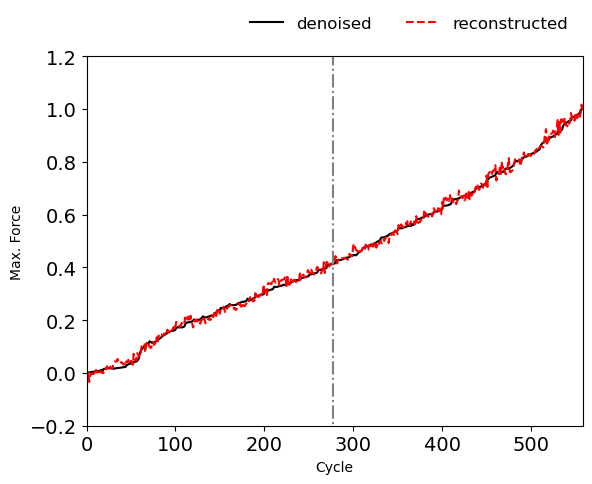

In [208]:

y= reconstructed[:,0]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI1']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

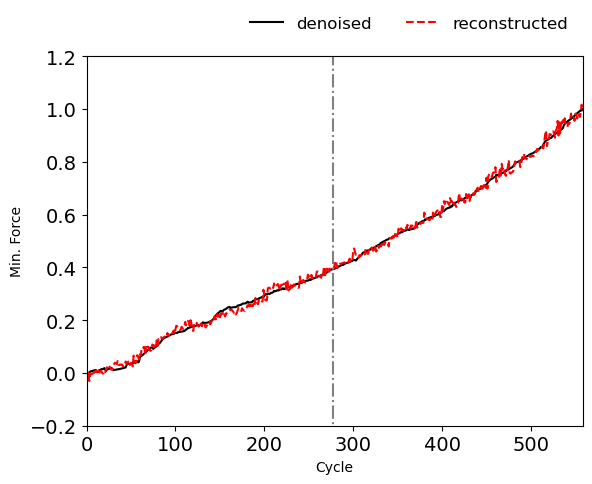

In [209]:
y= reconstructed[:,1]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI2']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

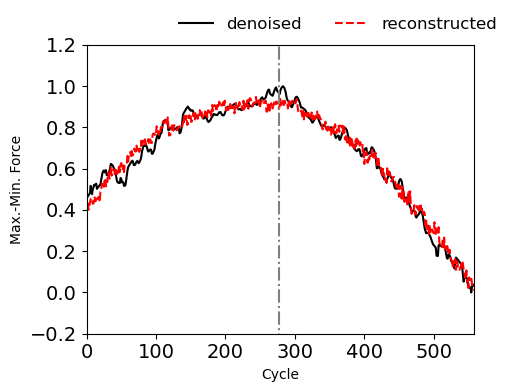

In [210]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,2]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI3']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max.-Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

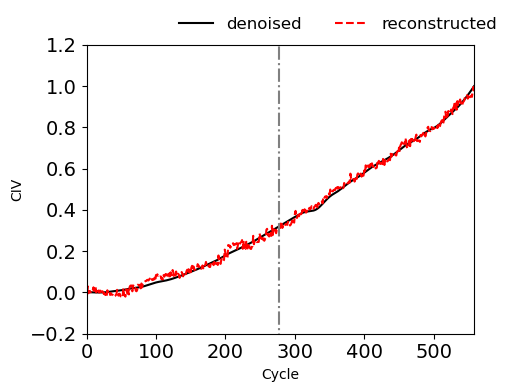

In [211]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,3]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI4']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("CIV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

<Figure size 500x375 with 0 Axes>

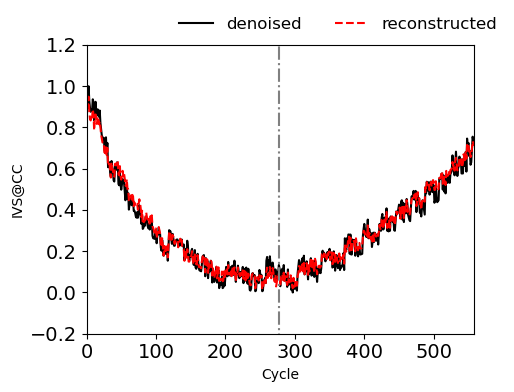

In [212]:
plt.figure(figsize=(5,3.75))
plt.figure(figsize=(5,3.75))
y= reconstructed[:,4]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI5']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("IVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

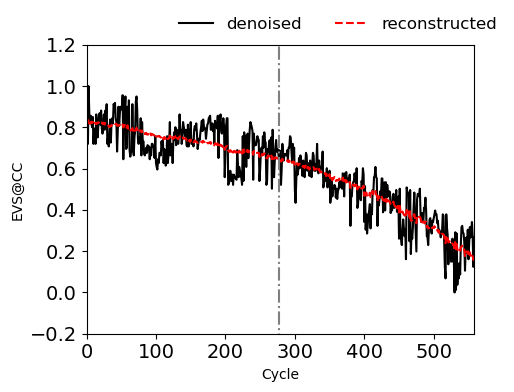

In [213]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,5]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI6']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("EVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

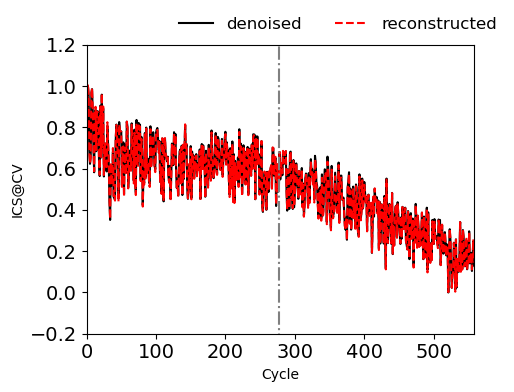

In [214]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,6]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI7']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ICS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

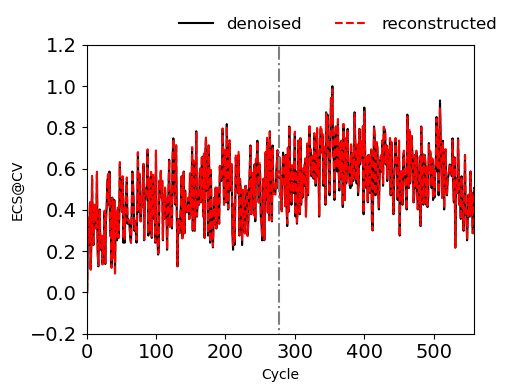

In [215]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,7]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI8']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ECS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

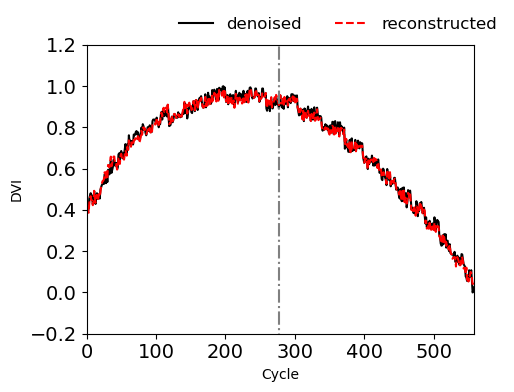

In [216]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,8]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI9']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("DVI")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

In [217]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

x=reconstructed
y=data['SOH']*100

y_max=y.max()
y_min=y.min()
y=(y-y_min)/(y_max-y_min)


x_train=x[:295,:]
y_train=y[:295]




kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_pred, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

RMSE: 0.0670372425194945


In [218]:
x=reconstructed[:,:3]
y=data['SOH']*100

y_max=y.max()
y_min=y.min()
y=(y-y_min)/(y_max-y_min)

x_train=x[:295,:]
y_train=y[:295]


kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_mechanical, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_mechanical))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 0.017152562605421768


In [219]:
x=reconstructed[:,3:]
y=data['SOH']*100

y_max=y.max()
y_min=y.min()
y=(y-y_min)/(y_max-y_min)

x_train=x[:295,:]
y_train=y[:295]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_Impedance, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_Impedance))

print("RMSE:", rmse)

RMSE: 0.10775716757478843


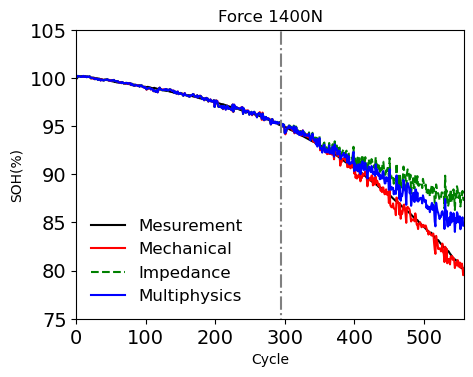

In [220]:
plt.figure(figsize=(5,3.75))
y_2= y_mechanical*(y_max-y_min)+y_min
y_4=y_pred*(y_max-y_min)+y_min
y_3=y_Impedance*(y_max-y_min)+y_min
x= np.arange(1, len(y) + 1)
y_soh=data['SOH']*100
plt.plot(x,y_soh,'k-',label='Mesurement')
plt.plot(x,y_2,'r-',label='Mechanical')
plt.plot(x,y_3,'g--',label='Impedance')
plt.plot(x,y_4,'b-',label='Multiphysics')

plt.title("Force 1400N")
plt.xlabel("Cycle")
plt.ylabel("SOH(%)")
plt.xlim([0,len(x)])
plt.ylim(75,105)
plt.axvline(295,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='lower left',frameon=False,fontsize=12)
plt.show()



In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
x=reconstructed
y=data['SOH']



x_train=x[:295,:]
y_train=y[:295]



# MLP 모델 구성
mlp_model = Sequential([
    Flatten(input_shape=(9,)),  # 9개의 특성을 가진 데이터를 평탄화
    Dense(16, activation='elu'),  # 첫 번째 은닉 레이어
    Dense(64, activation='elu'),  # 두 번째 은닉 레이어
    Dense(32, activation='elu'),  # 세 번째 은닉 레이어
    Dense(1)  # 출력 레이어
])

# 모델 컴파일
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error')

# 모델 요약
mlp_model.summary()

history = mlp_model.fit(x_train, y_train, epochs=500, batch_size=16, validation_split=0.2)
y_mlp= mlp_model.predict(x)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(y, y_mlp))
print("Test RMSE: ", rmse)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_44 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________
Train on 236 samples, validate on 59 samples
Epoch 1/500
236/236 [==============================] - 0s 1ms/sample - lo

236/236 [==============================] - 0s 102us/sample - loss: 1.0437e-05 - val_loss: 1.3435e-04
Epoch 65/500
236/236 [==============================] - 0s 106us/sample - loss: 1.2281e-05 - val_loss: 7.6110e-05
Epoch 66/500
236/236 [==============================] - 0s 144us/sample - loss: 1.0880e-05 - val_loss: 1.3089e-04
Epoch 67/500
236/236 [==============================] - 0s 102us/sample - loss: 9.9861e-06 - val_loss: 1.3506e-04
Epoch 68/500
236/236 [==============================] - 0s 106us/sample - loss: 1.0656e-05 - val_loss: 1.7294e-04
Epoch 69/500
236/236 [==============================] - 0s 106us/sample - loss: 1.4170e-05 - val_loss: 9.2978e-05
Epoch 70/500
236/236 [==============================] - 0s 102us/sample - loss: 1.0578e-05 - val_loss: 9.2675e-05
Epoch 71/500
236/236 [==============================] - 0s 102us/sample - loss: 1.1185e-05 - val_loss: 1.1028e-04
Epoch 72/500
236/236 [==============================] - 0s 102us/sample - loss: 1.0357e-05 - val_loss

236/236 [==============================] - 0s 119us/sample - loss: 9.0600e-06 - val_loss: 1.2228e-04
Epoch 136/500
236/236 [==============================] - 0s 123us/sample - loss: 8.3928e-06 - val_loss: 9.1085e-05
Epoch 137/500
236/236 [==============================] - 0s 119us/sample - loss: 1.3045e-05 - val_loss: 6.5614e-05
Epoch 138/500
236/236 [==============================] - 0s 123us/sample - loss: 8.0453e-06 - val_loss: 6.4485e-05
Epoch 139/500
236/236 [==============================] - 0s 123us/sample - loss: 7.6271e-06 - val_loss: 8.7740e-05
Epoch 140/500
236/236 [==============================] - 0s 119us/sample - loss: 7.1773e-06 - val_loss: 1.1381e-04
Epoch 141/500
236/236 [==============================] - 0s 119us/sample - loss: 7.6424e-06 - val_loss: 5.3577e-05
Epoch 142/500
236/236 [==============================] - 0s 119us/sample - loss: 7.6778e-06 - val_loss: 1.4106e-04
Epoch 143/500
236/236 [==============================] - 0s 123us/sample - loss: 9.1928e-06 - 

236/236 [==============================] - 0s 119us/sample - loss: 9.1492e-06 - val_loss: 5.1953e-05
Epoch 207/500
236/236 [==============================] - 0s 123us/sample - loss: 7.0003e-06 - val_loss: 1.0500e-04
Epoch 208/500
236/236 [==============================] - 0s 114us/sample - loss: 7.2384e-06 - val_loss: 4.2584e-05
Epoch 209/500
236/236 [==============================] - 0s 131us/sample - loss: 1.1093e-05 - val_loss: 9.6661e-05
Epoch 210/500
236/236 [==============================] - 0s 119us/sample - loss: 1.2028e-05 - val_loss: 1.4731e-04
Epoch 211/500
236/236 [==============================] - 0s 114us/sample - loss: 1.5142e-05 - val_loss: 2.5066e-05
Epoch 212/500
236/236 [==============================] - 0s 114us/sample - loss: 7.1667e-06 - val_loss: 8.0385e-05
Epoch 213/500
236/236 [==============================] - 0s 119us/sample - loss: 5.6884e-06 - val_loss: 2.8780e-05
Epoch 214/500
236/236 [==============================] - 0s 123us/sample - loss: 6.0954e-06 - 

236/236 [==============================] - 0s 119us/sample - loss: 5.1963e-06 - val_loss: 9.5921e-05
Epoch 278/500
236/236 [==============================] - 0s 165us/sample - loss: 1.3728e-05 - val_loss: 7.5192e-06
Epoch 279/500
236/236 [==============================] - 0s 123us/sample - loss: 8.6622e-06 - val_loss: 2.8829e-05
Epoch 280/500
236/236 [==============================] - 0s 123us/sample - loss: 4.6199e-06 - val_loss: 1.3887e-05
Epoch 281/500
236/236 [==============================] - 0s 119us/sample - loss: 4.8244e-06 - val_loss: 1.6816e-05
Epoch 282/500
236/236 [==============================] - 0s 123us/sample - loss: 7.8369e-06 - val_loss: 1.0688e-05
Epoch 283/500
236/236 [==============================] - 0s 114us/sample - loss: 1.6255e-05 - val_loss: 1.1615e-04
Epoch 284/500
236/236 [==============================] - 0s 110us/sample - loss: 1.1044e-05 - val_loss: 4.4720e-05
Epoch 285/500
236/236 [==============================] - 0s 110us/sample - loss: 8.2010e-06 - 

236/236 [==============================] - 0s 119us/sample - loss: 1.4815e-05 - val_loss: 1.1614e-05
Epoch 349/500
236/236 [==============================] - 0s 110us/sample - loss: 1.5518e-05 - val_loss: 1.4780e-04
Epoch 350/500
236/236 [==============================] - 0s 114us/sample - loss: 1.4098e-05 - val_loss: 5.7205e-05
Epoch 351/500
236/236 [==============================] - 0s 106us/sample - loss: 4.7863e-06 - val_loss: 4.5662e-05
Epoch 352/500
236/236 [==============================] - 0s 110us/sample - loss: 8.8812e-06 - val_loss: 1.8318e-05
Epoch 353/500
236/236 [==============================] - 0s 110us/sample - loss: 8.0321e-06 - val_loss: 1.0643e-05
Epoch 354/500
236/236 [==============================] - 0s 110us/sample - loss: 1.9884e-05 - val_loss: 2.6944e-04
Epoch 355/500
236/236 [==============================] - 0s 110us/sample - loss: 4.7091e-05 - val_loss: 2.1052e-05
Epoch 356/500
236/236 [==============================] - 0s 106us/sample - loss: 5.0066e-05 - 

236/236 [==============================] - 0s 119us/sample - loss: 8.8670e-06 - val_loss: 8.1413e-05
Epoch 420/500
236/236 [==============================] - 0s 123us/sample - loss: 2.1614e-05 - val_loss: 6.9693e-05
Epoch 421/500
236/236 [==============================] - 0s 119us/sample - loss: 1.6516e-05 - val_loss: 4.3243e-06
Epoch 422/500
236/236 [==============================] - 0s 119us/sample - loss: 2.2687e-05 - val_loss: 3.0244e-05
Epoch 423/500
236/236 [==============================] - 0s 119us/sample - loss: 1.4274e-05 - val_loss: 7.9449e-05
Epoch 424/500
236/236 [==============================] - 0s 119us/sample - loss: 3.5002e-05 - val_loss: 2.1868e-04
Epoch 425/500
236/236 [==============================] - 0s 119us/sample - loss: 3.4584e-05 - val_loss: 1.6106e-05
Epoch 426/500
236/236 [==============================] - 0s 119us/sample - loss: 1.0485e-05 - val_loss: 2.0297e-04
Epoch 427/500
236/236 [==============================] - 0s 119us/sample - loss: 3.6528e-05 - 

236/236 [==============================] - 0s 106us/sample - loss: 6.6589e-06 - val_loss: 2.9434e-05
Epoch 491/500
236/236 [==============================] - 0s 102us/sample - loss: 4.5187e-06 - val_loss: 5.1543e-05
Epoch 492/500
236/236 [==============================] - 0s 106us/sample - loss: 5.8635e-06 - val_loss: 3.9496e-05
Epoch 493/500
236/236 [==============================] - 0s 102us/sample - loss: 1.0552e-05 - val_loss: 4.8442e-05
Epoch 494/500
236/236 [==============================] - 0s 102us/sample - loss: 8.7468e-06 - val_loss: 1.1686e-05
Epoch 495/500
236/236 [==============================] - 0s 106us/sample - loss: 4.9863e-06 - val_loss: 2.3612e-05
Epoch 496/500
236/236 [==============================] - 0s 102us/sample - loss: 1.8993e-05 - val_loss: 7.7856e-05
Epoch 497/500
236/236 [==============================] - 0s 106us/sample - loss: 6.5813e-06 - val_loss: 4.5024e-05
Epoch 498/500
236/236 [==============================] - 0s 106us/sample - loss: 1.1902e-05 - 

In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

x=reconstructed
y=data['SOH']

x_train=x[:295,:]
y_train=y[:295]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x=x.reshape((x.shape[0],x.shape[1],1))


# DCNN 모델 구성
dcnn_model = Sequential([
    Conv1D(filters=8, kernel_size=20, activation='relu', input_shape=(9, 1),padding='same'),  # 첫 번째 컨볼루션 레이어
    #MaxPooling1D(pool_size=2),  # 첫 번째 맥스 풀링 레이어
    Conv1D(filters=8, kernel_size=10, activation='relu',padding='same'),  # 두 번째 컨볼루션 레이어
    #MaxPooling1D(pool_size=2),  # 두 번째 맥스 풀링 레이어
    Flatten(),  # 데이터 평탄화
    Dense(8, activation='relu'),  # 첫 번째 완전연결 레이어
    Dense(8, activation='relu'),  # 두 번째 완전연결 레이어
    Dense(1)  # 출력 레이어
])

# 모델 컴파일
dcnn_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mean_squared_error')

# 모델 요약
dcnn_model.summary()


history = dcnn_model.fit(x_train, y_train, epochs=500, batch_size=16, validation_split=0.2)
y_dcnn= dcnn_model.predict(x)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(y, y_dcnn))
print("Test RMSE: ", rmse)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 9, 8)              168       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 9, 8)              648       
_________________________________________________________________
flatten_10 (Flatten)         (None, 72)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 8)                 584       
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 9         
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
___________________________________________________

Epoch 64/500
236/236 [==============================] - 0s 140us/sample - loss: 3.9527e-05 - val_loss: 6.6616e-05
Epoch 65/500
236/236 [==============================] - 0s 140us/sample - loss: 3.9461e-05 - val_loss: 6.2238e-05
Epoch 66/500
236/236 [==============================] - 0s 144us/sample - loss: 3.4730e-05 - val_loss: 8.8705e-05
Epoch 67/500
236/236 [==============================] - 0s 144us/sample - loss: 2.9362e-05 - val_loss: 6.2670e-05
Epoch 68/500
236/236 [==============================] - 0s 144us/sample - loss: 2.9522e-05 - val_loss: 5.9853e-05
Epoch 69/500
236/236 [==============================] - 0s 144us/sample - loss: 2.6456e-05 - val_loss: 7.0985e-05
Epoch 70/500
236/236 [==============================] - 0s 144us/sample - loss: 2.3913e-05 - val_loss: 7.2180e-05
Epoch 71/500
236/236 [==============================] - 0s 144us/sample - loss: 2.1452e-05 - val_loss: 6.6390e-05
Epoch 72/500
236/236 [==============================] - 0s 140us/sample - loss: 1.9996e-

236/236 [==============================] - 0s 140us/sample - loss: 5.6677e-06 - val_loss: 3.3723e-05
Epoch 136/500
236/236 [==============================] - 0s 140us/sample - loss: 6.4013e-06 - val_loss: 4.8113e-05
Epoch 137/500
236/236 [==============================] - 0s 144us/sample - loss: 5.6243e-06 - val_loss: 4.4995e-05
Epoch 138/500
236/236 [==============================] - 0s 144us/sample - loss: 5.2928e-06 - val_loss: 4.3504e-05
Epoch 139/500
236/236 [==============================] - 0s 140us/sample - loss: 5.2576e-06 - val_loss: 4.4180e-05
Epoch 140/500
236/236 [==============================] - 0s 144us/sample - loss: 5.7123e-06 - val_loss: 2.1214e-05
Epoch 141/500
236/236 [==============================] - 0s 144us/sample - loss: 6.5948e-06 - val_loss: 4.2635e-05
Epoch 142/500
236/236 [==============================] - 0s 140us/sample - loss: 5.1942e-06 - val_loss: 3.6821e-05
Epoch 143/500
236/236 [==============================] - 0s 144us/sample - loss: 5.2572e-06 - 

236/236 [==============================] - 0s 136us/sample - loss: 4.7239e-06 - val_loss: 3.8020e-05
Epoch 207/500
236/236 [==============================] - 0s 144us/sample - loss: 5.3181e-06 - val_loss: 3.0669e-05
Epoch 208/500
236/236 [==============================] - 0s 140us/sample - loss: 4.4543e-06 - val_loss: 2.8361e-05
Epoch 209/500
236/236 [==============================] - 0s 140us/sample - loss: 4.7213e-06 - val_loss: 5.3952e-05
Epoch 210/500
236/236 [==============================] - 0s 136us/sample - loss: 5.8104e-06 - val_loss: 6.2297e-05
Epoch 211/500
236/236 [==============================] - 0s 140us/sample - loss: 5.6823e-06 - val_loss: 4.9275e-05
Epoch 212/500
236/236 [==============================] - 0s 140us/sample - loss: 5.8905e-06 - val_loss: 2.4989e-05
Epoch 213/500
236/236 [==============================] - 0s 140us/sample - loss: 5.8138e-06 - val_loss: 3.3302e-05
Epoch 214/500
236/236 [==============================] - 0s 144us/sample - loss: 5.0875e-06 - 

236/236 [==============================] - 0s 140us/sample - loss: 3.6534e-06 - val_loss: 6.1422e-05
Epoch 278/500
236/236 [==============================] - 0s 140us/sample - loss: 4.3501e-06 - val_loss: 4.3988e-05
Epoch 279/500
236/236 [==============================] - 0s 148us/sample - loss: 4.5235e-06 - val_loss: 7.0130e-05
Epoch 280/500
236/236 [==============================] - 0s 140us/sample - loss: 5.3877e-06 - val_loss: 4.2239e-05
Epoch 281/500
236/236 [==============================] - 0s 144us/sample - loss: 4.3469e-06 - val_loss: 4.4369e-05
Epoch 282/500
236/236 [==============================] - 0s 144us/sample - loss: 4.3670e-06 - val_loss: 3.4384e-05
Epoch 283/500
236/236 [==============================] - 0s 140us/sample - loss: 5.2353e-06 - val_loss: 6.4153e-05
Epoch 284/500
236/236 [==============================] - 0s 144us/sample - loss: 4.7507e-06 - val_loss: 5.9675e-05
Epoch 285/500
236/236 [==============================] - 0s 140us/sample - loss: 5.0351e-06 - 

236/236 [==============================] - 0s 136us/sample - loss: 5.1529e-06 - val_loss: 4.1138e-05
Epoch 349/500
236/236 [==============================] - 0s 136us/sample - loss: 3.4600e-06 - val_loss: 3.1055e-05
Epoch 350/500
236/236 [==============================] - 0s 140us/sample - loss: 4.4016e-06 - val_loss: 4.3571e-05
Epoch 351/500
236/236 [==============================] - 0s 140us/sample - loss: 3.6381e-06 - val_loss: 4.7020e-05
Epoch 352/500
236/236 [==============================] - 0s 136us/sample - loss: 4.4409e-06 - val_loss: 4.3535e-05
Epoch 353/500
236/236 [==============================] - 0s 140us/sample - loss: 7.8888e-06 - val_loss: 9.2676e-05
Epoch 354/500
236/236 [==============================] - 0s 140us/sample - loss: 5.5937e-06 - val_loss: 2.6602e-05
Epoch 355/500
236/236 [==============================] - 0s 140us/sample - loss: 5.2442e-06 - val_loss: 7.0621e-05
Epoch 356/500
236/236 [==============================] - 0s 140us/sample - loss: 3.8181e-06 - 

236/236 [==============================] - 0s 144us/sample - loss: 5.8489e-06 - val_loss: 3.7356e-05
Epoch 420/500
236/236 [==============================] - 0s 136us/sample - loss: 1.1162e-05 - val_loss: 2.1438e-05
Epoch 421/500
236/236 [==============================] - 0s 140us/sample - loss: 5.4299e-06 - val_loss: 3.6657e-05
Epoch 422/500
236/236 [==============================] - 0s 140us/sample - loss: 6.6093e-06 - val_loss: 2.8153e-05
Epoch 423/500
236/236 [==============================] - 0s 140us/sample - loss: 4.0806e-06 - val_loss: 5.5662e-05
Epoch 424/500
236/236 [==============================] - 0s 140us/sample - loss: 7.1791e-06 - val_loss: 3.6803e-05
Epoch 425/500
236/236 [==============================] - 0s 140us/sample - loss: 7.1661e-06 - val_loss: 4.5366e-05
Epoch 426/500
236/236 [==============================] - 0s 140us/sample - loss: 4.2040e-06 - val_loss: 4.6336e-05
Epoch 427/500
236/236 [==============================] - 0s 140us/sample - loss: 4.9079e-06 - 

236/236 [==============================] - 0s 144us/sample - loss: 6.3811e-06 - val_loss: 3.5309e-05
Epoch 491/500
236/236 [==============================] - 0s 144us/sample - loss: 1.1065e-05 - val_loss: 1.4289e-04
Epoch 492/500
236/236 [==============================] - 0s 144us/sample - loss: 6.2455e-06 - val_loss: 3.7794e-05
Epoch 493/500
236/236 [==============================] - 0s 140us/sample - loss: 5.2274e-06 - val_loss: 3.6187e-05
Epoch 494/500
236/236 [==============================] - 0s 140us/sample - loss: 4.7089e-06 - val_loss: 2.2253e-05
Epoch 495/500
236/236 [==============================] - 0s 144us/sample - loss: 5.6151e-06 - val_loss: 1.9787e-05
Epoch 496/500
236/236 [==============================] - 0s 140us/sample - loss: 6.0768e-06 - val_loss: 3.6135e-05
Epoch 497/500
236/236 [==============================] - 0s 140us/sample - loss: 1.2962e-05 - val_loss: 6.4050e-05
Epoch 498/500
236/236 [==============================] - 0s 148us/sample - loss: 1.0739e-05 - 

In [275]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

x=reconstructed
y=data['SOH']*100



x_train=x[:295,:]
y_train=y[:295]

# SVM 모델 생성 및 학습
svm_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(x_train, y_train)
relation=svm_model.score(x_train, y_train)
print('결정계수:',relation)

# 모델 평가
y_svm = svm_model.predict(x)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(y, y_svm))
print("Test RMSE: ", rmse)

결정계수: 0.9861333584605373
Test RMSE:  3.6054619504477827


In [271]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 가정된 입력 데이터 (558, 9)
x = reconstructed # 예시 데이터

# LSTM에 맞는 형태로 데이터 재구성
x_reshaped = x.reshape((x.shape[0],x.shape[1], 1))

print(x_reshaped)



[[[-0.02481705]
  [-0.0242148 ]
  [ 0.43000183]
  ...
  [ 0.86369735]
  [ 0.00794446]
  [ 0.42116496]]

 [[ 0.00261733]
  [ 0.00600295]
  [ 0.43204054]
  ...
  [ 1.0099039 ]
  [ 0.3700251 ]
  [ 0.41294724]]

 [[-0.0341593 ]
  [-0.0308007 ]
  [ 0.40130007]
  ...
  [ 0.9632359 ]
  [ 0.23826185]
  [ 0.38652235]]

 ...

 [[ 0.9864446 ]
  [ 0.986436  ]
  [ 0.02106795]
  ...
  [ 0.18436249]
  [ 0.28823718]
  [ 0.03548539]]

 [[ 1.0163789 ]
  [ 1.0161027 ]
  [ 0.01696798]
  ...
  [ 0.25799805]
  [ 0.2903473 ]
  [ 0.03124765]]

 [[ 0.9938315 ]
  [ 0.9932003 ]
  [ 0.01079223]
  ...
  [ 0.14487277]
  [ 0.50194097]
  [ 0.04588538]]]
ERROR! Session/line number was not unique in database. History logging moved to new session 395


In [286]:

x=np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
y=np.array([4,5,6,7])
x=x.reshape((x.shape[0],x.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(10,activation='relu',input_shape=(3,1)))
model.add(Dense(5))   
model.add(Dense(1))   # 예측하고자 하는 출력의 차원. 회귀 문제의 경우 보통 1입니다.


model.compile(optimizer='adam', loss='mse')
model.summary()



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 400
Traceback (most recent call last):
  File "C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tlsdu\AppData\Local\Temp\ipykernel_24384\853468188.py", line 2, in <module>
    model.add(LSTM(10,activation='relu',input_shape=(3,1)))
  File "C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\tensorflow_core\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\tensorflow_core\python\keras\engine\sequential.py", line 185, in add
    layer(x)
  File "C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\tensorflow_core\python\keras\layers\recurrent.py", line 644, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "C:\Users\tlsdu\

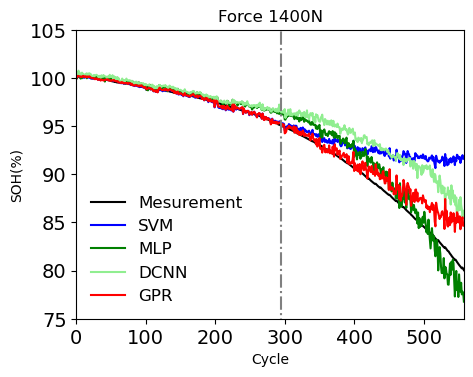

In [279]:
plt.figure(figsize=(5,3.75))
y_2= y_svm
y_4=y_dcnn
y_3=y_mlp
y_6=y_pred*(y_max-y_min)+y_min
x= np.arange(1, len(y) + 1)
y_soh=y
plt.plot(x,y_soh,'k-',label='Mesurement')
plt.plot(x,y_2,'b-',label='SVM')
plt.plot(x,y_3*100,'g-',label='MLP')
plt.plot(x,y_4*100,color='lightgreen',label='DCNN')
#plt.plot(x,y_5,color='orange',label='GPR')
plt.plot(x,y_6,'r-',label='GPR')

plt.title("Force 1400N")
plt.xlabel("Cycle")
plt.ylabel("SOH(%)")
plt.xlim([0,len(x)])
plt.ylim(75,105)
plt.axvline(295,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='lower left',frameon=False,fontsize=12)
plt.show()
